In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

In [2]:
df11 = pd.read_csv("annual_aqi_by_county_2011.csv")
df12 = pd.read_csv("annual_aqi_by_county_2012.csv")
df13 = pd.read_csv("annual_aqi_by_county_2013.csv")
df14 = pd.read_csv("annual_aqi_by_county_2014.csv")
df15 = pd.read_csv("annual_aqi_by_county_2015.csv")

In [3]:
frames = [df11, df12, df13, df14, df15]
df_air = pd.concat(frames).reset_index()
df_air.head()

,index,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,0,Alabama,Baldwin,2011,282,204,69,9,0,0,0,126,74,42,0,0,209,0,73,0
1,1,Alabama,Clay,2011,118,80,38,0,0,0,0,86,63,39,0,0,0,0,118,0
2,2,Alabama,Colbert,2011,279,214,64,1,0,0,0,101,61,42,0,0,197,0,82,0
3,3,Alabama,DeKalb,2011,336,257,78,1,0,0,0,101,63,40,0,0,271,0,65,0
4,4,Alabama,Elmore,2011,242,192,48,2,0,0,0,105,64,44,0,0,242,0,0,0


In [4]:
df_air.County = df_air.County + " County, " + df_air.State
df_air.head()

,index,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,0,Alabama,"Baldwin County, Alabama",2011,282,204,69,9,0,0,0,126,74,42,0,0,209,0,73,0
1,1,Alabama,"Clay County, Alabama",2011,118,80,38,0,0,0,0,86,63,39,0,0,0,0,118,0
2,2,Alabama,"Colbert County, Alabama",2011,279,214,64,1,0,0,0,101,61,42,0,0,197,0,82,0
3,3,Alabama,"DeKalb County, Alabama",2011,336,257,78,1,0,0,0,101,63,40,0,0,271,0,65,0
4,4,Alabama,"Elmore County, Alabama",2011,242,192,48,2,0,0,0,105,64,44,0,0,242,0,0,0


In [5]:
df_air.loc[df_air["State"]=="District Of Columbia",:].head()

,index,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
156,156,District Of Columbia,"District of Columbia County, District Of Columbia",2011,365,135,214,13,3,0,0,166,84,54,0,26,114,1,224,0
1243,150,District Of Columbia,"District of Columbia County, District Of Columbia",2012,366,127,211,24,4,0,0,182,90,56,0,22,139,0,205,0
2311,147,District Of Columbia,"District of Columbia County, District Of Columbia",2013,365,203,161,1,0,0,0,101,70,48,0,26,129,0,210,0
3373,147,District Of Columbia,"District of Columbia County, District Of Columbia",2014,365,225,136,4,0,0,0,140,67,47,0,19,181,0,165,0
4427,147,District Of Columbia,"District of Columbia County, District Of Columbia",2015,365,217,143,5,0,0,0,126,73,47,0,31,159,0,175,0


In [6]:
df_air["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [7]:
df_air.to_csv("final_ap_df.csv")

In [8]:
df_air.drop(columns=["index","State", "Year"], inplace=True)
final_df_air = df_air.groupby("County").min()
final_df_air.head()

,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
County,,,,,,,,,,,,,,,,
"Abbeville County, South Carolina",188,175,5,0,0,0,0,71,44,32,0,0,188,0,0,0
"Ada County, Idaho",365,276,62,0,0,0,0,115,61,36,1,10,183,0,29,9
"Adair County, Oklahoma",365,177,77,0,0,0,0,93,57,40,0,0,167,0,126,0
"Adams County, Colorado",364,204,91,3,0,0,0,115,64,45,0,97,195,0,6,15
"Adams County, Illinois",213,192,21,0,0,0,0,90,48,35,0,0,213,0,0,0


In [9]:
df_lung = pd.read_csv("lung_bycounty.csv", encoding = 'ISO-8859-1')
df_skin = pd.read_csv("skin_bycounty.csv", encoding = 'ISO-8859-1')
df_blood = pd.read_csv("leukemia_bycounty.csv", encoding = 'ISO-8859-1')

In [10]:
df_blood.head()

,County,FIPS,Met Healthy People Objective of ***?,"Age-Adjusted Incidence Rate() - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend () in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,"US (SEER+NPCR)(1,10)",0.0,***,13.6,13.6,13.7,47270,falling,-1.6,-2.7,-0.5
1,"Turner County, South Dakota(6,10)",46125.0,***,41.9,25.2,65.9,4,stable,-5.5,-43.8,58.8
2,"Mountrail County, North Dakota(6,10)",38061.0,***,35.7,20,58.7,3,*,*,*,*
3,"Bon Homme County, South Dakota(6,10)",46009.0,***,32.6,17.8,55.6,3,*,*,*,*
4,"Iron County, Wisconsin(6,10)",55051.0,***,30.2,15.6,56,3,*,*,*,*


In [11]:
df_skin.columns = ["County", "a", "Incidence Rate", "b", "c", "d", "e", "f", "g", "h"]
df_lung.columns = ["County", "a", "a2", "Incidence Rate", "b", "c", "d", "e", "f", "g", "h"]
df_blood.columns = ["County", "a", "a2", "Incidence Rate", "b", "c", "d", "e", "f", "g", "h"]

df_skin.drop(columns=["a","b", "c", "d", "e", "f", "g", "h"], inplace=True)
df_lung.drop(columns=["a", "a2", "b", "c", "d", "e", "f", "g", "h"], inplace=True)
df_blood.drop(columns=["a", "a2", "b", "c", "d", "e", "f", "g", "h"], inplace=True)

In [12]:
df_skin["Incidence Rate"] = df_skin["Incidence Rate"].str.replace("#", "")
df_lung["Incidence Rate"] = df_lung["Incidence Rate"].str.replace("#", "")
df_blood["Incidence Rate"] = df_blood["Incidence Rate"].str.replace("#", "")
df_blood.head()


,County,Incidence Rate
0,"US (SEER+NPCR)(1,10)",13.6
1,"Turner County, South Dakota(6,10)",41.9
2,"Mountrail County, North Dakota(6,10)",35.7
3,"Bon Homme County, South Dakota(6,10)",32.6
4,"Iron County, Wisconsin(6,10)",30.2


In [13]:
df_skin.drop(0, inplace=True)
df_lung.drop(0, inplace=True)
df_blood.drop(0, inplace=True)
df_skin.head()

,County,Incidence Rate
1,"Beaver County, Utah(7)",79.6
2,"Summit County, Utah(7,8)",76.1
3,"Towns County, Georgia(7,8)",62.1
4,"Pickens County, Georgia(7,8)",61.6
5,"Lumpkin County, Georgia(7,8)",56.8


In [14]:
new_skin = df_skin["County"].str.split("(", n = 1, expand = True)
df_skin["County"]= new_skin[0]
df_skin.head()

,County,Incidence Rate
1,"Beaver County, Utah",79.6
2,"Summit County, Utah",76.1
3,"Towns County, Georgia",62.1
4,"Pickens County, Georgia",61.6
5,"Lumpkin County, Georgia",56.8


In [15]:
new_blood = df_blood["County"].str.split("(", n = 1, expand = True)
df_blood["County"]= new_blood[0]
df_blood.head()

,County,Incidence Rate
1,"Turner County, South Dakota",41.9
2,"Mountrail County, North Dakota",35.7
3,"Bon Homme County, South Dakota",32.6
4,"Iron County, Wisconsin",30.2
5,"Washington County, Kentucky",29.4


In [16]:
new_lung = df_lung["County"].str.split("(", n = 1, expand = True)
df_lung["County"]= new_lung[0]
df_lung.head()

,County,Incidence Rate
1,"Union County, Florida",215.1
2,"Owsley County, Kentucky",179.7
3,"McCreary County, Kentucky",154.1
4,"North Slope Borough, Alaska",150.8
5,"Powell County, Kentucky",140.9


In [17]:
!!!!

['/bin/bash: !!: command not found']

In [18]:
df_skin.head()

,County,Incidence Rate
1,"Beaver County, Utah",79.6
2,"Summit County, Utah",76.1
3,"Towns County, Georgia",62.1
4,"Pickens County, Georgia",61.6
5,"Lumpkin County, Georgia",56.8


In [19]:
df_stroke = pd.read_csv("Stroke Data Merge.csv", encoding = 'ISO-8859-1')
df_stroke.head()

,County,Stroke_IR
0,"Abbeville County, South Carolina",87.3
1,"Acadia Parish County, Louisiana",88.9
2,"Accomack County, Virginia",75.2
3,"Ada County, Idaho",66.8
4,"Adair County, Iowa",62.0


In [20]:
df_blood_mod = df_blood
df_skin_mod = df_skin
df_lung_mod = df_lung
df_stroke_mod = df_stroke

In [21]:
df_blood_mod.head()

,County,Incidence Rate
1,"Turner County, South Dakota",41.9
2,"Mountrail County, North Dakota",35.7
3,"Bon Homme County, South Dakota",32.6
4,"Iron County, Wisconsin",30.2
5,"Washington County, Kentucky",29.4


In [22]:
df_stroke_mod.head()

,County,Stroke_IR
0,"Abbeville County, South Carolina",87.3
1,"Acadia Parish County, Louisiana",88.9
2,"Accomack County, Virginia",75.2
3,"Ada County, Idaho",66.8
4,"Adair County, Iowa",62.0


In [23]:
df_skin.rename(columns={"Incidence Rate": "Skin_IR"}, inplace=True)
df_skin.head()

,County,Skin_IR
1,"Beaver County, Utah",79.6
2,"Summit County, Utah",76.1
3,"Towns County, Georgia",62.1
4,"Pickens County, Georgia",61.6
5,"Lumpkin County, Georgia",56.8


In [24]:
df_blood.rename(columns={"Incidence Rate": "Blood_IR"}, inplace=True)
df_lung.rename(columns={"Incidence Rate": "Lung_IR"}, inplace=True)

In [25]:
skin_lung_df = pd.merge(df_skin, df_lung, on='County')
skin_lung_df.head()

,County,Skin_IR,Lung_IR
0,"Summit County, Utah",76.1,18.6
1,"Towns County, Georgia",62.1,65.9
2,"Pickens County, Georgia",61.6,81.5
3,"Lumpkin County, Georgia",56.8,73.6
4,"Forsyth County, Georgia",55.2,54.6


In [26]:
final_cancer_df = pd.merge(skin_lung_df, df_blood, on='County')
final_cancer_df.head()

,County,Skin_IR,Lung_IR,Blood_IR
0,"Summit County, Utah",76.1,18.6,11.2
1,"Towns County, Georgia",62.1,65.9,*
2,"Pickens County, Georgia",61.6,81.5,16.4
3,"Lumpkin County, Georgia",56.8,73.6,15.5
4,"Forsyth County, Georgia",55.2,54.6,16.9


In [27]:
final_cancer_df.Skin_IR = final_cancer_df.Skin_IR.str.replace("*", "")
final_cancer_df.Lung_IR = final_cancer_df.Lung_IR.str.replace("*", "")
final_cancer_df.Blood_IR = final_cancer_df.Blood_IR.str.replace("*", "")
final_cancer_df.head()

,County,Skin_IR,Lung_IR,Blood_IR
0,"Summit County, Utah",76.1,18.6,11.2
1,"Towns County, Georgia",62.1,65.9,
2,"Pickens County, Georgia",61.6,81.5,16.4
3,"Lumpkin County, Georgia",56.8,73.6,15.5
4,"Forsyth County, Georgia",55.2,54.6,16.9


In [28]:
final_df = pd.merge(final_df_air, final_cancer_df, on='County')
final_df.head()

,County,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Skin_IR,Lung_IR,Blood_IR
0,"Abbeville County, South Carolina",188,175,5,0,0,0,0,71,44,32,0,0,188,0,0,0,18.2,69.2,11.9
1,"Ada County, Idaho",365,276,62,0,0,0,0,115,61,36,1,10,183,0,29,9,33,52.3,16
2,"Adams County, Colorado",364,204,91,3,0,0,0,115,64,45,0,97,195,0,6,15,15.3,52.9,12
3,"Adams County, Illinois",213,192,21,0,0,0,0,90,48,35,0,0,213,0,0,0,31.9,73.1,11.1
4,"Adams County, Mississippi",174,139,34,1,0,0,0,101,67,41,0,0,174,0,0,0,13,65.5,12.5


In [29]:
final_df = pd.merge(final_df, df_stroke, on='County')
final_df.head()

,County,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,...,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Skin_IR,Lung_IR,Blood_IR,Stroke_IR
0,"Abbeville County, South Carolina",188,175,5,0,0,0,0,71,44,...,0,0,188,0,0,0,18.2,69.2,11.9,87.3
1,"Ada County, Idaho",365,276,62,0,0,0,0,115,61,...,1,10,183,0,29,9,33,52.3,16,66.8
2,"Adams County, Colorado",364,204,91,3,0,0,0,115,64,...,0,97,195,0,6,15,15.3,52.9,12,67.3
3,"Adams County, Illinois",213,192,21,0,0,0,0,90,48,...,0,0,213,0,0,0,31.9,73.1,11.1,58.9
4,"Adams County, Mississippi",174,139,34,1,0,0,0,101,67,...,0,0,174,0,0,0,13,65.5,12.5,88.7


In [30]:
len(final_df)

923

In [31]:
# Scatter Plot Data / Code 

final_df[final_df.Blood_IR==' '] = np.nan
final_df[final_df.Stroke_IR==' '] = np.nan
final_df["Blood_IR"]= final_df["Blood_IR"].astype("float")
final_df["Blood_IR"]= final_df["Blood_IR"].astype("float")
final_df["Skin_IR"]= final_df["Skin_IR"].astype("float")
final_df["Lung_IR"]= final_df["Lung_IR"].astype("float")
final_df["Stroke_IR"]= final_df["Stroke_IR"].astype("float")

/Users/olgataranukha/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


/Users/olgataranukha/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.patches.Patch object at 0x1a23024c18> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


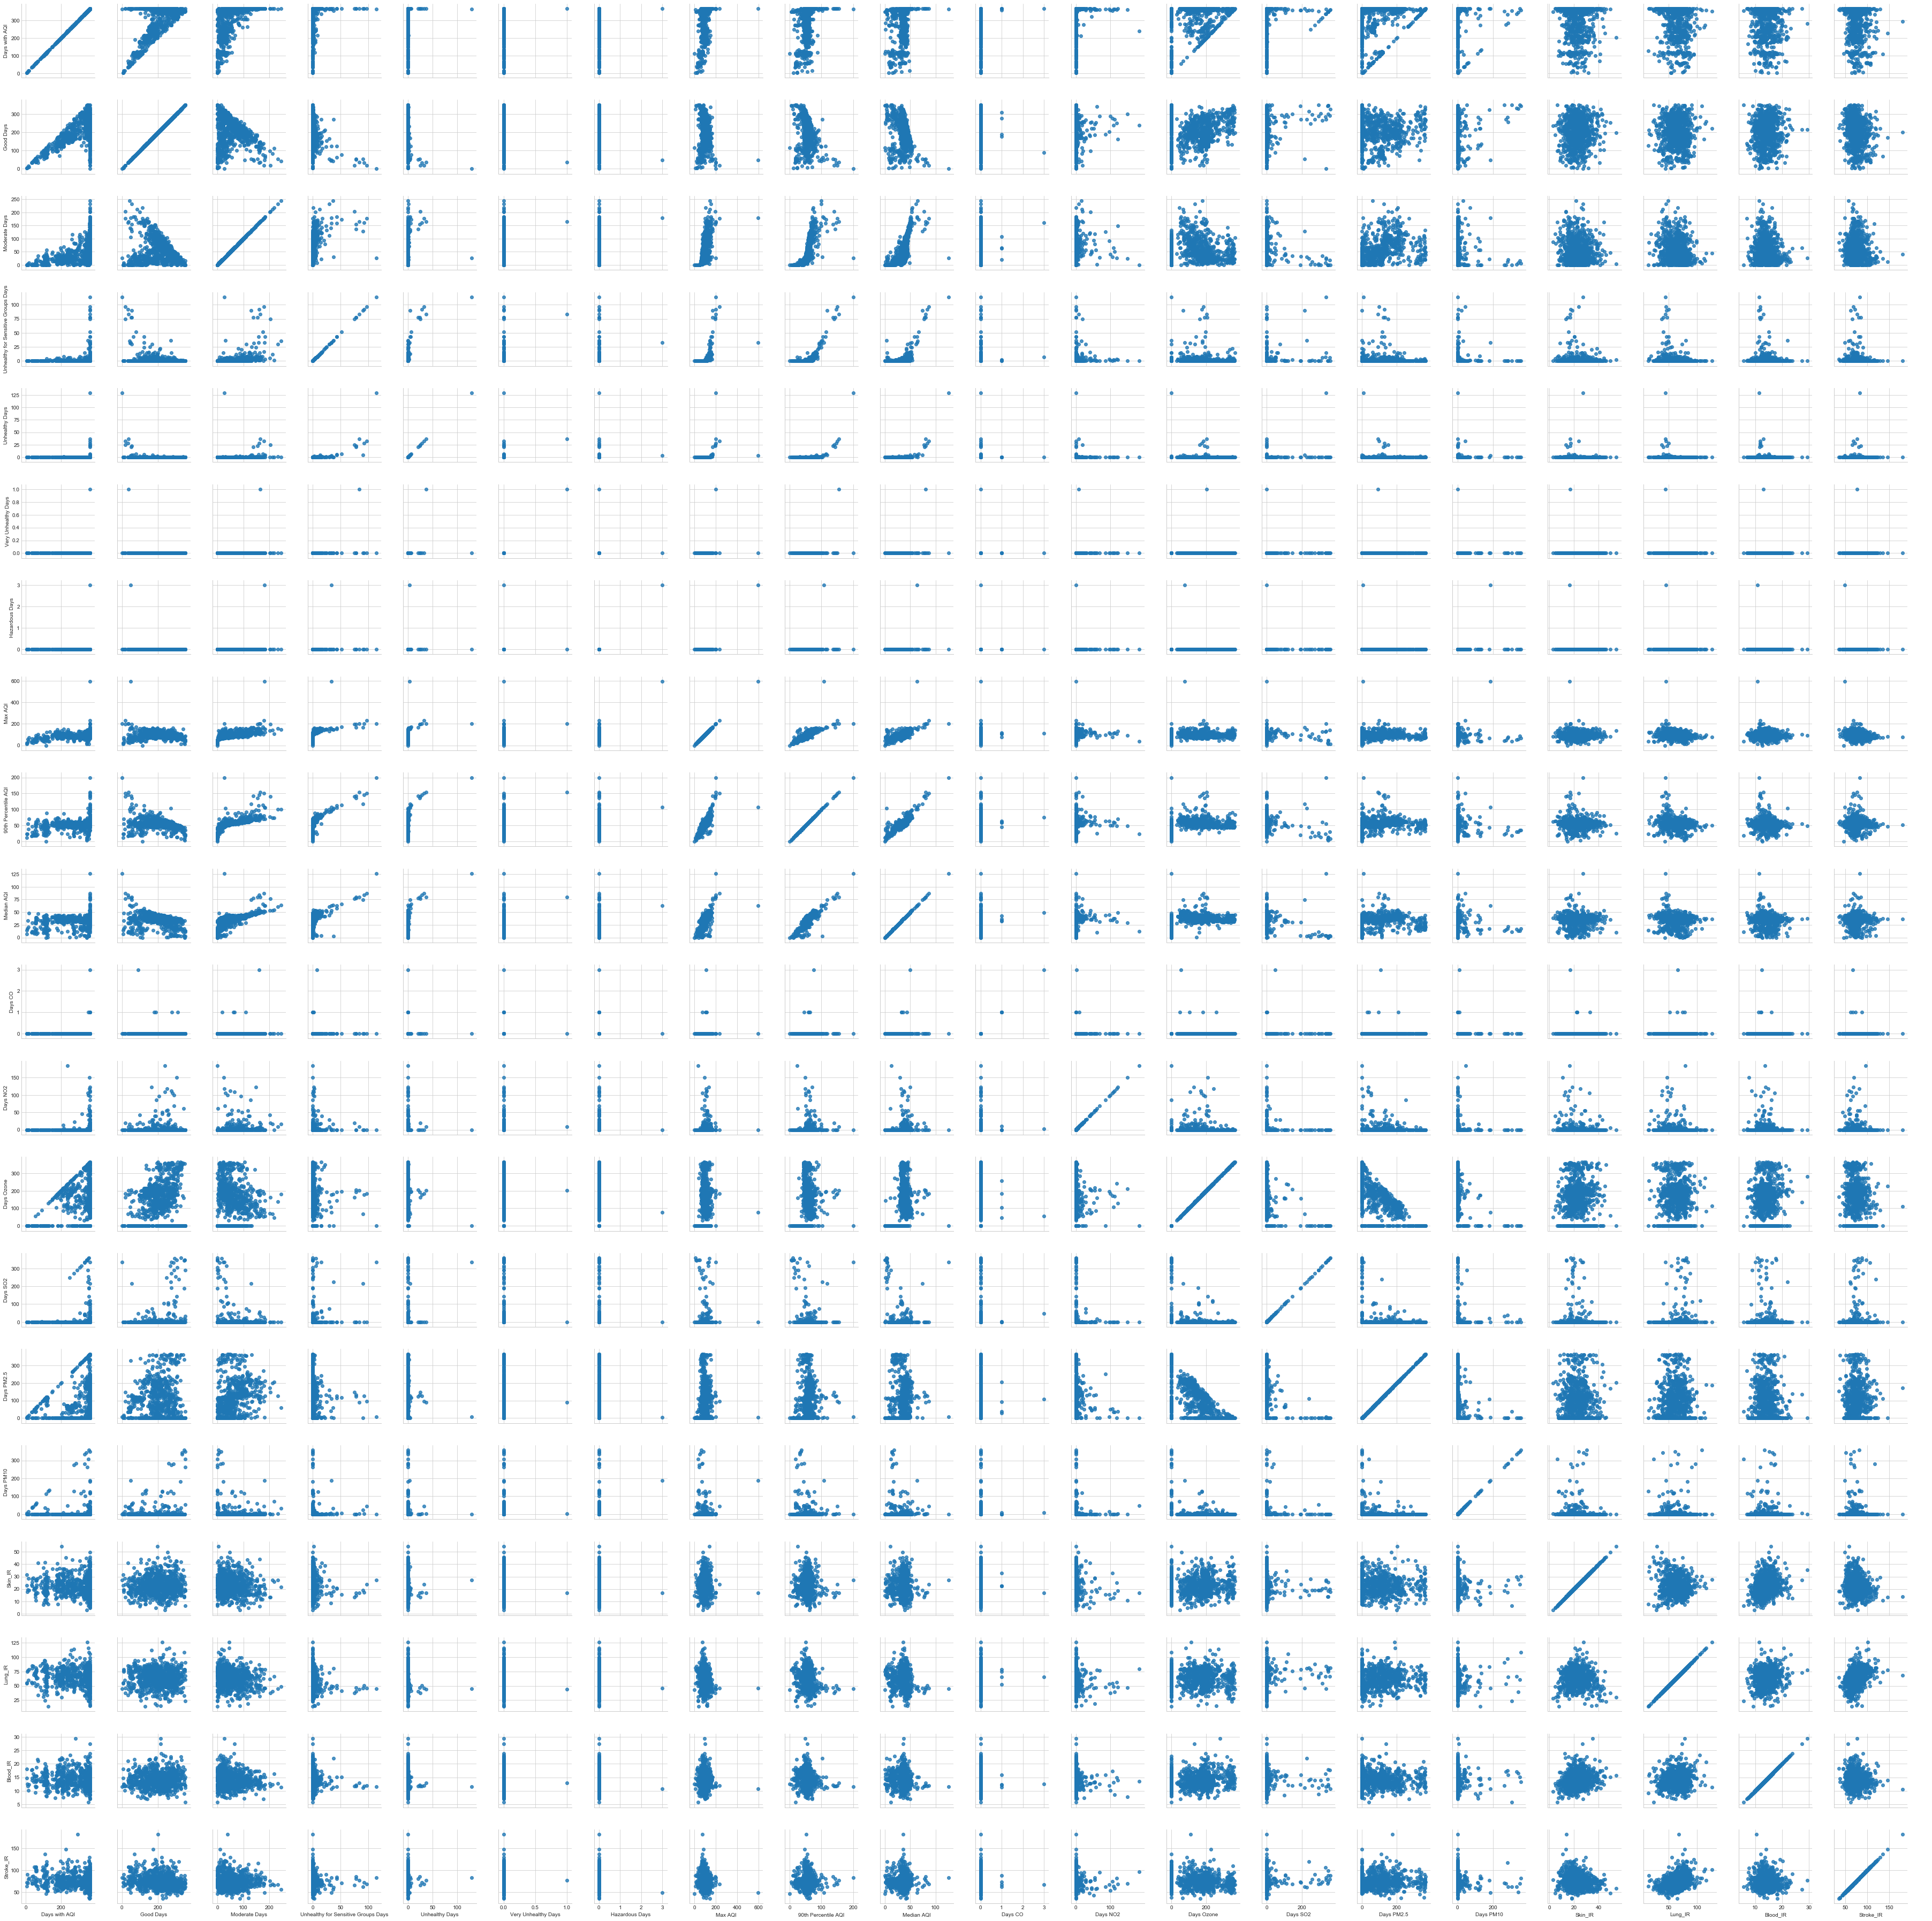

In [32]:
IPython_default = plt.rcParams.copy()
rcParams['figure.figsize'] = 10, 8
plt.rc('lines', linewidth=1)
plt.style.use('seaborn-whitegrid')
g = sns.PairGrid(final_df, palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

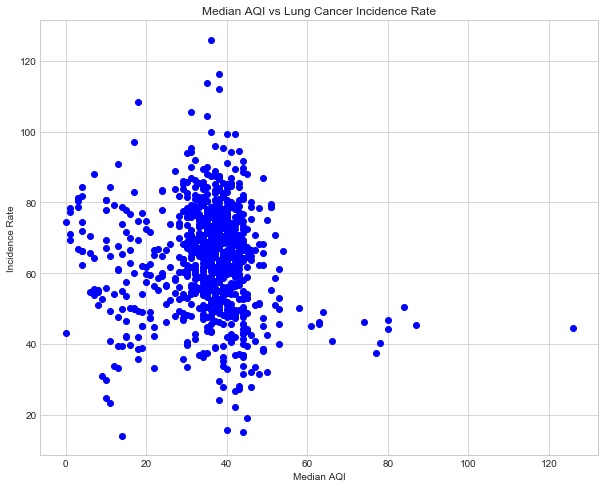

In [33]:
plt.plot(final_df["Median AQI"].astype("float"), final_df["Lung_IR"].astype("float"), "bo")
plt.title("Median AQI vs Lung Cancer Incidence Rate")
plt.xlabel("Median AQI")
plt.ylabel("Incidence Rate")
plt.show()

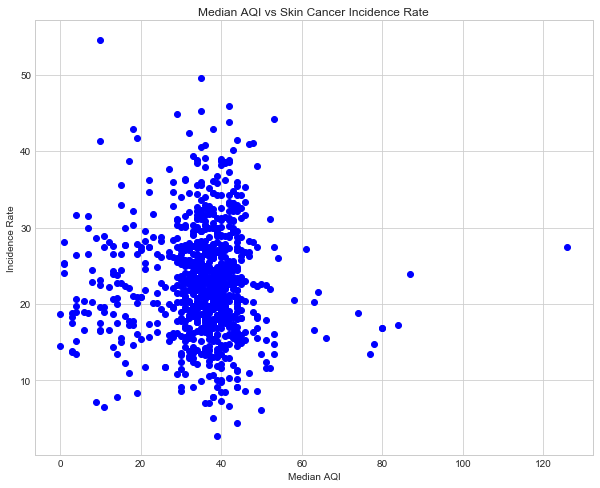

In [34]:
plt.plot(final_df["Median AQI"].astype("float"), final_df["Skin_IR"].astype("float"), "bo")
plt.title("Median AQI vs Skin Cancer Incidence Rate")
plt.xlabel("Median AQI")
plt.ylabel("Incidence Rate")
plt.show()

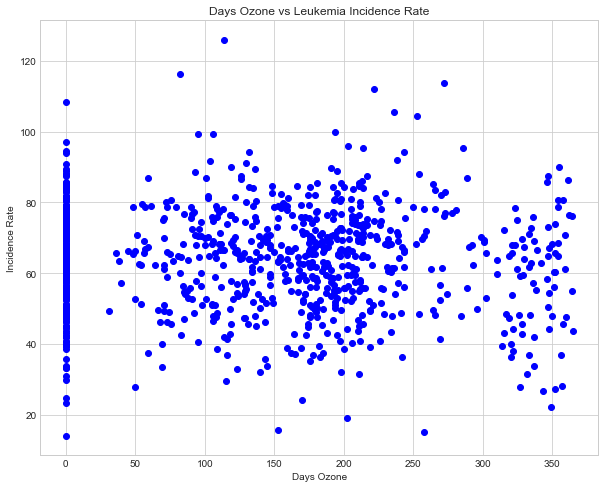

In [35]:
plt.plot(final_df["Days Ozone"].astype("float"), final_df["Lung_IR"].astype("float"), "bo")
plt.title("Days Ozone vs Leukemia Incidence Rate")
plt.xlabel("Days Ozone")
plt.ylabel("Incidence Rate")
plt.show()

**Olga**

In [68]:
df_blood_mod.head()

,County,Illness_Rate,Illness_Type
1,"Turner County, South Dakota",41.9,Blood cancer
2,"Mountrail County, North Dakota",35.7,Blood cancer
3,"Bon Homme County, South Dakota",32.6,Blood cancer
4,"Iron County, Wisconsin",30.2,Blood cancer
5,"Washington County, Kentucky",29.4,Blood cancer


In [53]:
df_blood_mod.rename(columns={"Blood_IR": "Illness_Rate"}, inplace=True)
df_lung_mod.rename(columns={"Lung_IR": "Illness_Rate"}, inplace=True)
df_skin_mod.rename(columns={"Skin_IR": "Illness_Rate"}, inplace=True)
df_stroke_mod.rename(columns={"Stroke_IR": "Illness_Rate"}, inplace=True)
df_stroke_mod.head()

,County,Illness_Rate,Illness_Type
0,"Abbeville County, South Carolina",87.3,Stroke
1,"Acadia Parish County, Louisiana",88.9,Stroke
2,"Accomack County, Virginia",75.2,Stroke
3,"Ada County, Idaho",66.8,Stroke
4,"Adair County, Iowa",62.0,Stroke


In [54]:
df_blood_mod["Illness_Type"] = "Blood cancer"
df_blood_mod["Illness_Rate"] = df_blood_mod["Illness_Rate"].str.replace("#", "")
df_blood_mod["Illness_Rate"] = df_blood_mod["Illness_Rate"].str.replace("*", "")
df_blood_mod["Illness_Rate"] = df_blood_mod["Illness_Rate"].str.replace("¶", "")
df_blood_mod.head()

,County,Illness_Rate,Illness_Type
1,"Turner County, South Dakota",41.9,Blood cancer
2,"Mountrail County, North Dakota",35.7,Blood cancer
3,"Bon Homme County, South Dakota",32.6,Blood cancer
4,"Iron County, Wisconsin",30.2,Blood cancer
5,"Washington County, Kentucky",29.4,Blood cancer


In [55]:
df_lung_mod["Illness_Type"] = "Lung cancer"
df_lung_mod["Illness_Rate"] = df_lung_mod["Illness_Rate"].str.replace("#", "")
df_lung_mod["Illness_Rate"] = df_lung_mod["Illness_Rate"].str.replace("*", "")
df_lung_mod["Illness_Rate"] = df_lung_mod["Illness_Rate"].str.replace("¶", "")
df_lung_mod.head()

,County,Illness_Rate,Illness_Type
1,"Union County, Florida",215.1,Lung cancer
2,"Owsley County, Kentucky",179.7,Lung cancer
3,"McCreary County, Kentucky",154.1,Lung cancer
4,"North Slope Borough, Alaska",150.8,Lung cancer
5,"Powell County, Kentucky",140.9,Lung cancer


In [56]:
df_skin_mod["Illness_Type"] = "Skin cancer"
df_skin_mod["Illness_Rate"] = df_skin_mod["Illness_Rate"].str.replace("#", "")
df_skin_mod["Illness_Rate"] = df_skin_mod["Illness_Rate"].str.replace("*", "")
df_skin_mod["Illness_Rate"] = df_skin_mod["Illness_Rate"].str.replace("¶", "")
df_skin_mod.head()

,County,Illness_Rate,Illness_Type
1,"Beaver County, Utah",79.6,Skin cancer
2,"Summit County, Utah",76.1,Skin cancer
3,"Towns County, Georgia",62.1,Skin cancer
4,"Pickens County, Georgia",61.6,Skin cancer
5,"Lumpkin County, Georgia",56.8,Skin cancer


In [57]:
df_stroke_mod["Illness_Type"] = "Stroke"
df_stroke_mod.head()

,County,Illness_Rate,Illness_Type
0,"Abbeville County, South Carolina",87.3,Stroke
1,"Acadia Parish County, Louisiana",88.9,Stroke
2,"Accomack County, Virginia",75.2,Stroke
3,"Ada County, Idaho",66.8,Stroke
4,"Adair County, Iowa",62.0,Stroke


In [58]:
print("lung:")
print(df_lung_mod.count())
print("blood:")
print(df_blood_mod.count())
print("skin:")
print(df_skin_mod.count())
print("stroke:")
print(df_stroke_mod.count())

lung:
County          2709
Illness_Rate    2709
Illness_Type    2709
dtype: int64
blood:
County          3161
Illness_Rate    3141
Illness_Type    3169
dtype: int64
skin:
County          2075
Illness_Rate    2075
Illness_Type    2075
dtype: int64
stroke:
County          3222
Illness_Rate    3211
Illness_Type    3222
dtype: int64


In [59]:
frames_cancer = [df_lung_mod, df_blood_mod, df_skin_mod, df_stroke_mod]
cancer_df = pd.concat(frames_cancer).reset_index()
cancer_df.count()

index           11175
County          11167
Illness_Rate    11136
Illness_Type    11175
dtype: int64

In [60]:
cancer_df.head()

,index,County,Illness_Rate,Illness_Type
0,1,"Union County, Florida",215.1,Lung cancer
1,2,"Owsley County, Kentucky",179.7,Lung cancer
2,3,"McCreary County, Kentucky",154.1,Lung cancer
3,4,"North Slope Borough, Alaska",150.8,Lung cancer
4,5,"Powell County, Kentucky",140.9,Lung cancer


In [61]:
cancer_df[cancer_df["Illness_Type"]=="Stroke"].count()

index           3222
County          3222
Illness_Rate    3211
Illness_Type    3222
dtype: int64

In [62]:
cancer_df[cancer_df["Illness_Type"]=="Stroke"].iloc[0:10,:]

,index,County,Illness_Rate,Illness_Type
7953,0,"Abbeville County, South Carolina",87.3,Stroke
7954,1,"Acadia Parish County, Louisiana",88.9,Stroke
7955,2,"Accomack County, Virginia",75.2,Stroke
7956,3,"Ada County, Idaho",66.8,Stroke
7957,4,"Adair County, Iowa",62,Stroke
7958,5,"Adair County, Kentucky",84.2,Stroke
7959,6,"Adair County, Missouri",80.1,Stroke
7960,7,"Adair County, Oklahoma",76.8,Stroke
7961,8,"Adams County, Colorado",67.3,Stroke
7962,9,"Adams County, Iowa",74.7,Stroke


In [63]:
cancer_df[cancer_df["Illness_Type"]=="Blood cancer"].iloc[0:10,:]

,index,County,Illness_Rate,Illness_Type
2709,1,"Turner County, South Dakota",41.9,Blood cancer
2710,2,"Mountrail County, North Dakota",35.7,Blood cancer
2711,3,"Bon Homme County, South Dakota",32.6,Blood cancer
2712,4,"Iron County, Wisconsin",30.2,Blood cancer
2713,5,"Washington County, Kentucky",29.4,Blood cancer
2714,6,"Ford County, Illinois",27.8,Blood cancer
2715,7,"Scott County, Arkansas",27.5,Blood cancer
2716,8,"Union County, South Dakota",27.4,Blood cancer
2717,9,"Page County, Iowa",26.6,Blood cancer
2718,10,"Barton County, Missouri",26.3,Blood cancer


In [64]:
cancer_df.reset_index()
cancer_df.set_index("index", inplace = True)
cancer_df.head()

,County,Illness_Rate,Illness_Type
index,,,
1,"Union County, Florida",215.1,Lung cancer
2,"Owsley County, Kentucky",179.7,Lung cancer
3,"McCreary County, Kentucky",154.1,Lung cancer
4,"North Slope Borough, Alaska",150.8,Lung cancer
5,"Powell County, Kentucky",140.9,Lung cancer


In [65]:
cancer_df.tail()

,County,Illness_Rate,Illness_Type
index,,,
3217,"Yuma County, Arizona",57,Stroke
3218,"Yuma County, Colorado",62,Stroke
3219,"Zapata County, Texas",73.5,Stroke
3220,"Zavala County, Texas",76.3,Stroke
3221,"Ziebach County, South Dakota",51.9,Stroke


In [66]:
cancer_df = cancer_df[cancer_df['Illness_Rate'].isna()==False]

In [67]:
cancer_df.tail()

,County,Illness_Rate,Illness_Type
index,,,
3217,"Yuma County, Arizona",57,Stroke
3218,"Yuma County, Colorado",62,Stroke
3219,"Zapata County, Texas",73.5,Stroke
3220,"Zavala County, Texas",76.3,Stroke
3221,"Ziebach County, South Dakota",51.9,Stroke


In [74]:
# add population data
population_df = pd.read_csv("PEP_2015_PEPANNRES_with_ann.csv", encoding = 'ISO-8859-1')
population_df.columns = ["County","Population"]
population_df.head()

,County,Population
0,"Autauga County, Alabama",55347
1,"Baldwin County, Alabama",203709
2,"Barbour County, Alabama",26489
3,"Bibb County, Alabama",22583
4,"Blount County, Alabama",57673


In [75]:
population_df.Population.value_counts()

5903       3
17403      3
14977      2
59660      2
1397       2
22810      2
54277      2
17555      2
25512      2
10483      2
9440       2
26521      2
9383       2
24040      2
8769       2
20366      2
25788      2
7131       2
3956       2
4854       2
27103      2
9899       2
12622      2
6585       2
37585      2
3876       2
6856       2
6415       2
18340      2
2236       2
          ..
1358       1
179533     1
19787      1
50398      1
5448       1
1410       1
286085     1
15753      1
11703      1
38352      1
142799     1
14162      1
1361350    1
28946      1
11715      1
490945     1
52671      1
68348      1
9650       1
21900      1
3499       1
54696      1
17830      1
7589       1
46500      1
54688      1
52639      1
269721     1
7569       1
18433      1
Name: Population, Length: 3164, dtype: int64

In [76]:
population_df = population_df[population_df['Population'].isna()==False]

In [77]:
population_df.count()

County        3220
Population    3220
dtype: int64

In [78]:
# merge illness data with population from  https://factfinder.census.gov/(US Census) 
cancer_pop_df = pd.DataFrame(pd.merge(cancer_df, population_df, how = "inner", on='County'))
cancer_pop_df.head()

,County,Illness_Rate,Illness_Type,Population
0,"Union County, Florida",215.1,Lung cancer,15234
1,"Union County, Florida",24.5,Blood cancer,15234
2,"Union County, Florida",37.4,Skin cancer,15234
3,"Union County, Florida",86.4,Stroke,15234
4,"Owsley County, Kentucky",179.7,Lung cancer,4461


In [48]:
aqi_illness_df_mod = pd.DataFrame(pd.merge(final_df_air, cancer_df, how = "inner", on='County'))
aqi_illness_df_mod.head()

,County,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Illness_Rate,Illness_Type
0,"Abbeville County, South Carolina",188,175,5,0,0,0,0,71,44,32,0,0,188,0,0,0,69.2,Lung cancer
1,"Abbeville County, South Carolina",188,175,5,0,0,0,0,71,44,32,0,0,188,0,0,0,11.9,Blood cancer
2,"Abbeville County, South Carolina",188,175,5,0,0,0,0,71,44,32,0,0,188,0,0,0,18.2,Skin cancer
3,"Abbeville County, South Carolina",188,175,5,0,0,0,0,71,44,32,0,0,188,0,0,0,87.3,Stroke
4,"Ada County, Idaho",365,276,62,0,0,0,0,115,61,36,1,10,183,0,29,9,52.3,Lung cancer


In [49]:
aqi_illness_df_mod = aqi_illness_df_mod[aqi_illness_df_mod['Illness_Rate'].isna()==False]

In [50]:
aqi_illness_df_mod[aqi_illness_df_mod['Illness_Rate'] == ' '] = np.nan

In [51]:
aqi_illness_df_mod['Illness_Rate'] = aqi_illness_df_mod['Illness_Rate'].astype('float')

In [52]:
aqi_illness_df_mod['Illness_Type'] = aqi_illness_df_mod["Illness_Type"].astype('category')

In [53]:
aqi_illness_df_mod["Illness_Type"].value_counts()

Stroke          1071
Lung cancer      985
Skin cancer      925
Blood cancer     874
Name: Illness_Type, dtype: int64

In [54]:
cm = plt.get_cmap('viridis')
cmap = sns.cubehelix_palette(dark=1, light=.5, as_cmap=True)

#colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
colors = ["windows blue", "red", "faded green", "purple"]
#cm = plt.cm.register_cmap("windows blue", "red", "faded green", "purple")

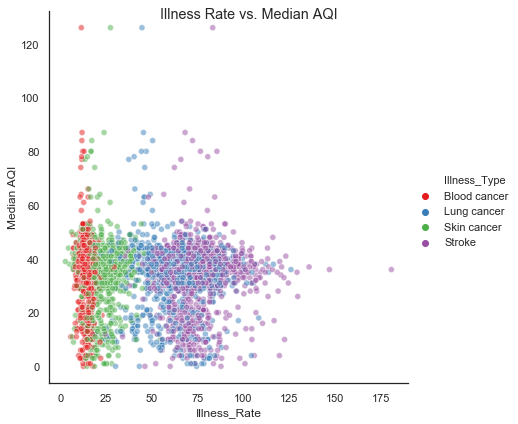

In [57]:
# Create subplot
sns.set_palette("husl")
sns.set(style="white")
#sns.palplot(sns.xkcd_palette(colors))
#snc.set_palette(colors)
#sns.set_style(style="dark")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot illness rate vs. Median AQ
ax = sns.relplot(x="Illness_Rate", y="Median AQI", hue="Illness_Type", #size="Days with AQI", markers="o", #edgecolor = "black",
            alpha=.5, palette="Set1", #palette="muted",
            height=6, data=aqi_illness_df_mod)

# Set title
# fig.suptitle("Illness rate vs. Median AQt)", y=0.95, fontsize=12, fontweight='bold')
suptitle = ax.fig.suptitle("Illness Rate vs. Median AQI")
# ax.fig(figsize(10,16))

# Save scatter plot
ax.fig.savefig("Images/IllnessVsMedianAQI.png", bbox_inches="tight")

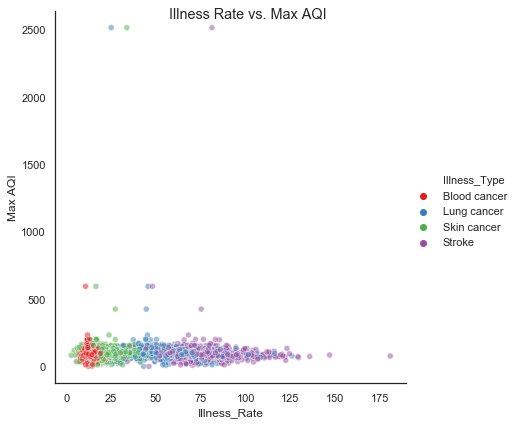

In [58]:
ax = sns.relplot(x="Illness_Rate", y="Max AQI", hue="Illness_Type", #size="Days with AQI", markers="o", #edgecolor = "black",
            alpha=.5, palette="Set1", #palette="muted",
            height=6, data=aqi_illness_df_mod)

# Set title
# fig.suptitle("Illness rate vs. Median AQt)", y=0.95, fontsize=12, fontweight='bold')
suptitle = ax.fig.suptitle("Illness Rate vs. Max AQI")
# ax.fig(figsize(10,16))

# Save scatter plot
ax.fig.savefig("Images/IllnessVsMaxAQI.png", bbox_inches="tight")

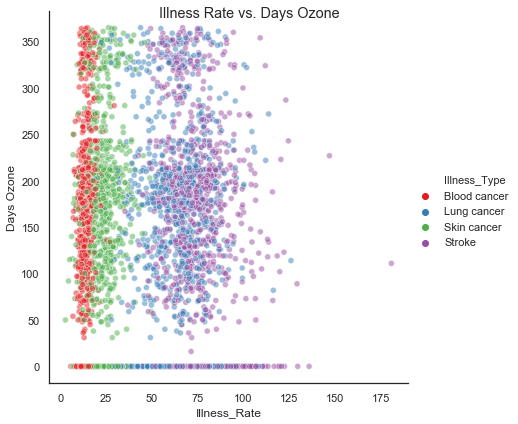

In [59]:
ax = sns.relplot(x="Illness_Rate", y="Days Ozone", hue="Illness_Type", #size="Days with AQI", markers="o", #edgecolor = "black",
            alpha=.5, palette="Set1", #palette="muted",
            height=6, data=aqi_illness_df_mod)

# Set title
# fig.suptitle("Illness rate vs. Median AQt)", y=0.95, fontsize=12, fontweight='bold')
suptitle = ax.fig.suptitle("Illness Rate vs. Days Ozone")
# ax.fig(figsize(10,16))

# Save scatter plot
ax.fig.savefig("Images/IllnessVsDaysOzone.png", bbox_inches="tight")

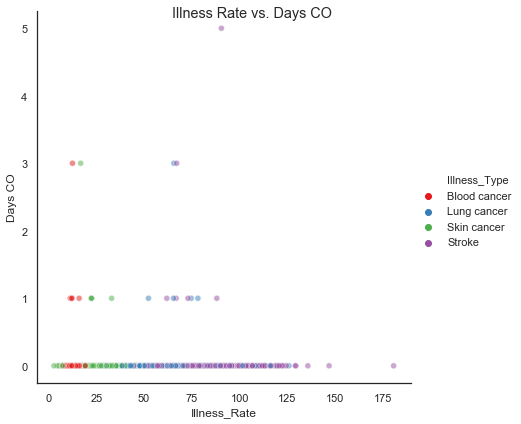

In [60]:
ax = sns.relplot(x="Illness_Rate", y="Days CO", hue="Illness_Type", #size="Days with AQI", markers="o", #edgecolor = "black",
            alpha=.5, palette="Set1", #palette="muted",
            height=6, data=aqi_illness_df_mod)

# Set title
# fig.suptitle("Illness rate vs. Median AQt)", y=0.95, fontsize=12, fontweight='bold')
suptitle = ax.fig.suptitle("Illness Rate vs. Days CO")
# ax.fig(figsize(10,16))

# Save scatter plot
ax.fig.savefig("Images/IllnessVsDaysCO.png", bbox_inches="tight")

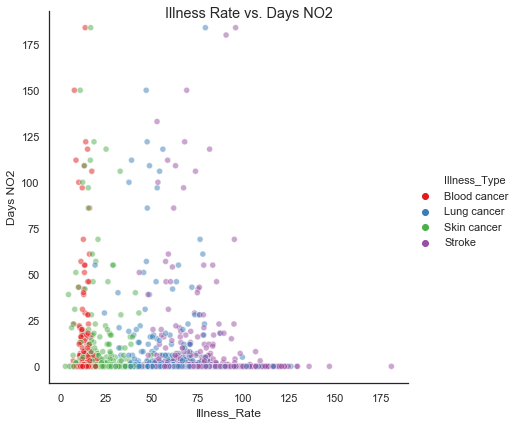

In [61]:
ax = sns.relplot(x="Illness_Rate", y="Days NO2", hue="Illness_Type", #size="Days with AQI", markers="o", #edgecolor = "black",
            alpha=.5, palette="Set1", #palette="muted",
            height=6, data=aqi_illness_df_mod)

# Set title
# fig.suptitle("Illness rate vs. Median AQt)", y=0.95, fontsize=12, fontweight='bold')
suptitle = ax.fig.suptitle("Illness Rate vs. Days NO2")
# ax.fig(figsize(10,16))

# Save scatter plot
ax.fig.savefig("Images/IllnessVsDaysNO2.png", bbox_inches="tight")

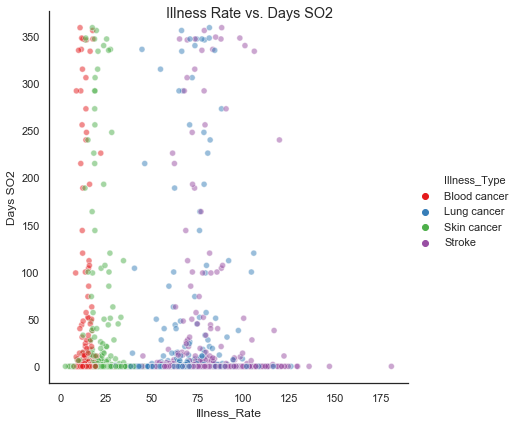

In [62]:
ax = sns.relplot(x="Illness_Rate", y="Days SO2", hue="Illness_Type", #size="Days with AQI", markers="o", #edgecolor = "black",
            alpha=.5, palette="Set1", #palette="muted",
            height=6, data=aqi_illness_df_mod)

# Set title
# fig.suptitle("Illness rate vs. Median AQt)", y=0.95, fontsize=12, fontweight='bold')
suptitle = ax.fig.suptitle("Illness Rate vs. Days SO2")
# ax.fig(figsize(10,16))

# Save scatter plot
ax.fig.savefig("Images/IllnessVsDaysSO2.png", bbox_inches="tight")

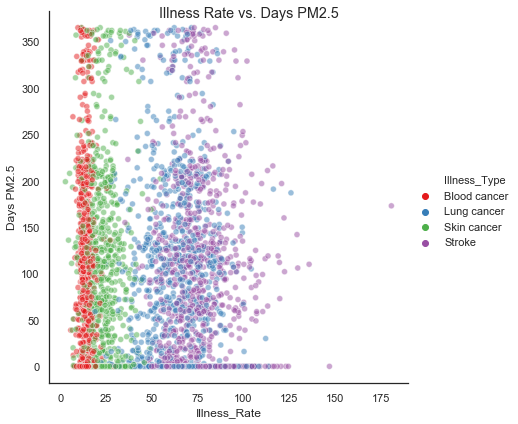

In [63]:
ax = sns.relplot(x="Illness_Rate", y="Days PM2.5", hue="Illness_Type", #size="Days with AQI", markers="o", #edgecolor = "black",
            alpha=.5, palette="Set1", #palette="muted",
            height=6, data=aqi_illness_df_mod)

# Set title
# fig.suptitle("Illness rate vs. Median AQt)", y=0.95, fontsize=12, fontweight='bold')
suptitle = ax.fig.suptitle("Illness Rate vs. Days PM2.5")
# ax.fig(figsize(10,16))

# Save scatter plot
ax.fig.savefig("Images/IllnessVsDaysPM2.png", bbox_inches="tight")

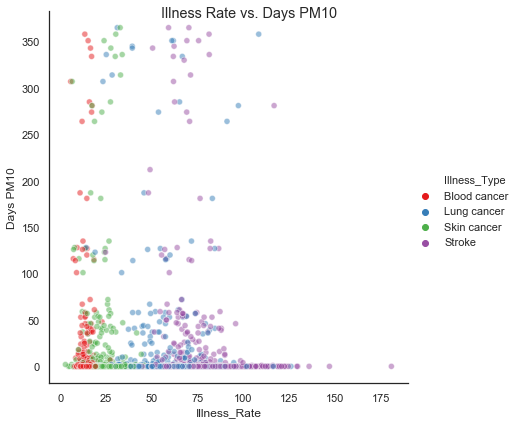

In [64]:
ax = sns.relplot(x="Illness_Rate", y="Days PM10", hue="Illness_Type", #size="Days with AQI", markers="o", #edgecolor = "black",
            alpha=.5, palette="Set1", #palette="muted",
            height=6, data=aqi_illness_df_mod)

# Set title
# fig.suptitle("Illness rate vs. Median AQt)", y=0.95, fontsize=12, fontweight='bold')
suptitle = ax.fig.suptitle("Illness Rate vs. Days PM10")
# ax.fig(figsize(10,16))

# Save scatter plot
ax.fig.savefig("Images/IllnessVsDaysPM10.png", bbox_inches="tight")